<a href="https://colab.research.google.com/github/MonilMehta/Synapse_LP/blob/week4/Synapse_LP_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
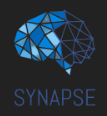

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [ ]:
#write code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Synapse/csvs/train2.csv')

In [ ]:
# df = pd.concat([df_train,df_test],axis=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [ ]:
# try researching about regex
print(df['Name'])
import re
df['Title']=df['Name'].str.extract(r',\s*([^,]+)\.')
df['Title']


0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [ ]:
#write code here
df.drop(['PassengerId','Ticket','Name'],inplace=True,axis=1)
df.reset_index(inplace=True)

### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [ ]:
df.isnull().sum()/df.shape[0]*100

index        0.000000
Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
Title        0.000000
dtype: float64

In [ ]:
#write code here
percent_missing = df.isnull().mean()*100
print(percent_missing)
df.loc[:, df.isnull().mean() < 0.50]

index        0.000000
Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
Title        0.000000
dtype: float64


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,2,1,3,female,26.0,0,0,7.9250,S,Miss
3,3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Rev
887,887,1,1,female,19.0,0,0,30.0000,S,Miss
888,888,0,3,female,NaN,1,2,23.4500,S,Miss
889,889,1,1,male,26.0,0,0,30.0000,C,Mr


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [ ]:
#write code here
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
# print(df['Embarked'].mode())
print(df['Age'].isnull().sum())
print(df['Embarked'].isnull().sum())

0
0


### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [ ]:
#write code here
df['Family_members']=df['SibSp']+df['Parch']

In [ ]:
#Normalize the columns ("Age", "Fare", "Family_members")
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Fare'] = scaler.fit_transform(df[['Fare']])
df['Family_members'] = scaler.fit_transform(df[['Family_members']])

In [ ]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
encoded_data=pd.get_dummies(df,columns=['Pclass','Sex','Title','Embarked'])
encoded_data

,index,Survived,Age,SibSp,Parch,Fare,Cabin,Family_members,Pclass_1,Pclass_2,...,Title_Mr,Title_Mrs,Title_Mrs. Martin (Elizabeth L,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0.271174,1,0,0.014151,NaN,0.1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,0.472229,1,0,0.139136,C85,0.1,1,0,...,0,1,0,0,0,0,0,1,0,0
2,2,1,0.321438,0,0,0.015469,NaN,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1,0.434531,1,0,0.103644,C123,0.1,1,0,...,0,1,0,0,0,0,0,0,0,1
4,4,0,0.434531,0,0,0.015713,NaN,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,0.334004,0,0,0.025374,NaN,0.0,0,1,...,0,0,0,0,1,0,0,0,0,1
887,887,1,0.233476,0,0,0.058556,B42,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
888,888,0,0.367921,1,2,0.045771,NaN,0.3,0,0,...,0,0,0,0,0,0,0,0,0,1
889,889,1,0.321438,0,0,0.058556,C148,0.0,1,0,...,1,0,0,0,0,0,0,1,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [ ]:
#write code here
y=encoded_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<b>remove the y_label (survived) from the dataframe</b>

In [ ]:
#write code here
encoded_data.drop(['Survived','index','Cabin'],axis=1,inplace=True)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [ ]:
#write code here
from sklearn.model_selection import train_test_split
X=encoded_data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [ ]:
#write code here
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=42,max_depth=6)
dt_model.fit(X_train,y_train)
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

0.869983948635634
0.835820895522388


In [ ]:
#write code here
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=42,max_depth=6,criterion='entropy')

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

<b>Print the Model Accuracy</b>

In [ ]:
#write code here
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

0.8651685393258427
0.8507462686567164


## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans: Disease Diagnosis as Decision Tree narrows down the possibility of aving a disease, thus can help diagnose patients.
Decision tree can alsobe used in Fraud detection.

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [ ]:
train_score=[]
test_score=[]
for depth in range(1,10):
  dt2_model=DecisionTreeClassifier(random_state=42,max_depth=depth,criterion='entropy')
  dt2_model.fit(X_train,y_train)
  train_score.append(dt2_model.score(X_train,y_train))
  test_score.append(dt2_model.score(X_test,y_test))
  print(f'Accuracy Score for depth : {depth} - train : {dt2_model.score(X_train,y_train)} and test is : {dt2_model.score(X_test,y_test)}')

Accuracy Score for depth : 1 - train : 0.7784911717495987 and test is : 0.7910447761194029
Accuracy Score for depth : 2 - train : 0.7961476725521669 and test is : 0.7723880597014925
Accuracy Score for depth : 3 - train : 0.8250401284109149 and test is : 0.8171641791044776
Accuracy Score for depth : 4 - train : 0.8394863563402889 and test is : 0.8283582089552238
Accuracy Score for depth : 5 - train : 0.8491171749598716 and test is : 0.832089552238806
Accuracy Score for depth : 6 - train : 0.8651685393258427 and test is : 0.8507462686567164
Accuracy Score for depth : 7 - train : 0.8780096308186196 and test is : 0.8022388059701493
Accuracy Score for depth : 8 - train : 0.9020866773675762 and test is : 0.8208955223880597
Accuracy Score for depth : 9 - train : 0.9213483146067416 and test is : 0.8022388059701493


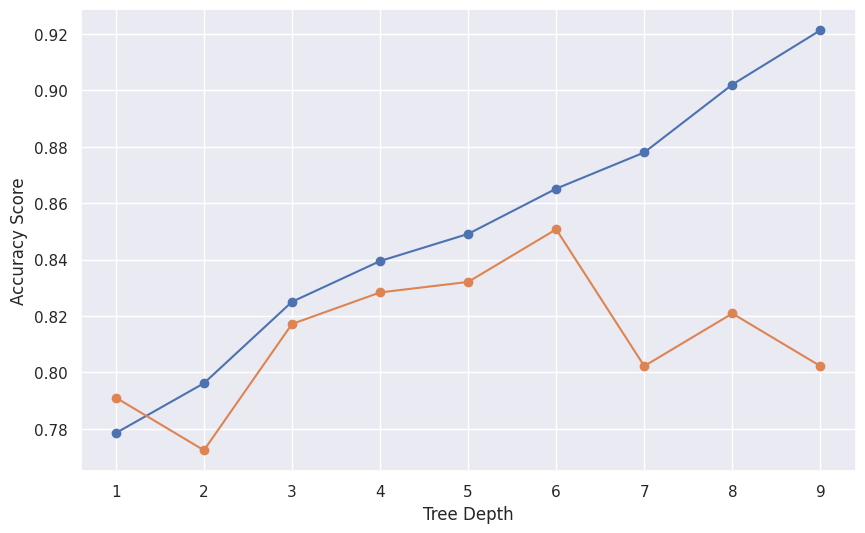

In [56]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), train_score, marker='o')
plt.plot(range(1, 10), test_score,marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Score')
plt.show()

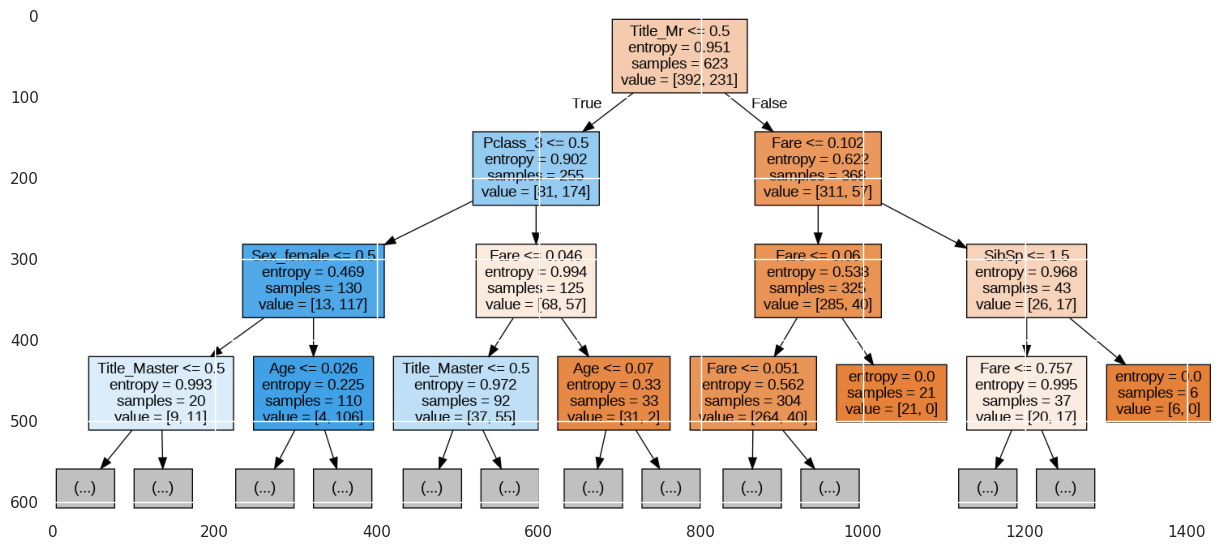

In [ ]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=3, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

0.8651685393258427
0.8507462686567164


## Explain: What is your understanding of the charts you made above?

Ans:
From the first graph we can check various accuracy scores from max_depth 1 to 10 and thus find out that we get the best accuracy at max_depth=6.
From the second graph we see how is the data divided into different nodes along with the total samples under the root node and their corresponding gini values.

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [ ]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_train,y_train)
MNB.score(X_test,y_test)

0.8022388059701493

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(X_train,y_train)
GNB.score(X_test,y_test)

0.6044776119402985

In [ ]:
print(y_test[:10])
print(MNB.predict(X_test[:10]))
print(GNB.predict(X_test[:10]))

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64
[0 0 0 1 1 1 1 0 1 1]
[0 0 0 0 0 0 0 0 0 0]


## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans:
Decision tree is prone to overfitting while Naive Bayes handles it well.


Decision tree is a discriminative model, whereas Naive bayes is a generative model.


Through Gaussian model,Naive bayes can handle continous data.

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
#write code here

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=15)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=15)

## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans:
Maybe if the dataset is simple with not many columns?

## Extra - BaggingClassifier

In [ ]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

param_grid1={
    'n_estimators':[10,20,30,40,50],
    'max_features':['auto','sqrt'],
    'max_depth':[1,2,3,4,5,6],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2],
    'bootstrap':[True,False]
}

rf_model=RandomForestClassifier()
rf_grid=GridSearchCV(estimator=rf_model,param_grid=param_grid1,cv=3,verbose=2,n_jobs=4)

rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=2)

In [ ]:
rf_grid.best_params_
print(f'Train - {rf_grid.score(X_train,y_train)}')
print(f'Train - {rf_grid.score(X_test,y_test)}')

Train - 0.8571428571428571
Train - 0.8208955223880597


## Explain: What is the difference between Random Forest and Bagging Classifier

Ans:

Random forest uses Decision tree while baggig classifier can use any type of learner.

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc=AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
cv_scores = cross_val_score(abc, X_train, y_train, cv=5)
print(cv_scores.mean())

0.8186193548387097


## Explain: What is the difference between Bagging and Boosting?

Ans:
In bagging the different models are trained independently and in parallel.
While in boosting the models adapt to the previous models correcting previous wrongs.

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [ ]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score

In [ ]:
#Prepruning
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)
gcv_model = gcv.best_estimator_
gcv_model.fit(X_train,y_train)
print(f'Train-{gcv_model.score(X_train,y_train)}')
print(f'Test-{gcv_model.score(X_test,y_test)}')

Train-0.869983948635634
Test-0.8171641791044776


In [ ]:
#postpruning Need to read more on it
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid

path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_scores = []

for i in ccp_alphas:
  prunedtest_model = DecisionTreeClassifier(ccp_alpha=i, max_depth=6, criterion='entropy', splitter='best')
  ccp_scores.append(cross_val_score(prunedtest_model, X_train, y_train, cv=5).mean())

alpha = ccp_alphas[ccp_scores.index(max(ccp_scores))]

pruned_model = DecisionTreeClassifier(ccp_alpha=alpha, max_depth=6, criterion='entropy', splitter='best')
pruned_model.fit(X_train, y_train)

print(f'Train acc: {pruned_model.score(X_train, y_train)}')
print(f'Test acc: {pruned_model.score(X_test,y_test)}')

Train acc: 0.8362760834670947
Test acc: 0.8283582089552238


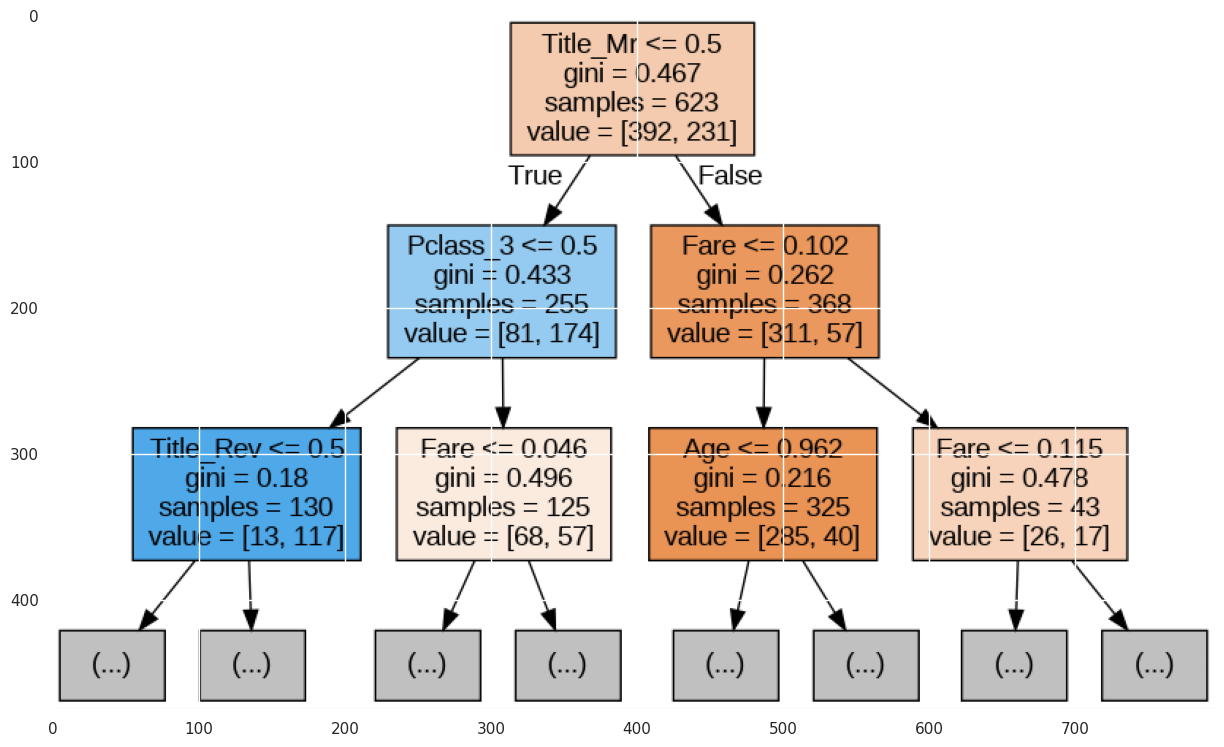

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(gcv_model, out_file='tree.dot', feature_names=X_train.columns,max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans: Actually The original decision tree with tuning of hyperparameters gave me the best accuracy with taking criterion as entropy.


# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **XG Boost Classifier and Regressor**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

**XGBoost** is an implementation of Gradient Boosted decision trees.In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree.

Some Advantages of XGBoost are :


*   Handling of Missing Values: XGBoost has built-in support for handling missing values, making it easy to work with real-world data that often has missing values.
*   Performance: XGBoost has a strong track record of producing high-quality results in various machine learning tasks
*   Scalability: XGBoost is designed for efficient and scalable training of machine learning models, making it suitable for large datasets.

Some shortcomings of XGBoost are:


*   Memory Requirements: XGBoost can be memory-intensive, especially when working with large datasets, making it less suitable for systems with limited memory resources.
*   Overfitting: XGBoost can be prone to overfitting, especially when trained on small datasets or when too many trees are used in the model.




**XGBoostClassifier**  is designed specifically for classification problems, employing a gradient-boosted decision tree framework with a unique objective function tailored to optimize classification outcomes. It incorporates regularization techniques, such as L1 and L2 regularization, to manage model complexity and mitigate overfitting.

On the other hand,**XGBoostRegressor**  is used for regression tasks, utilizing the same decision tree framework but with an function designed for optimizing continuous output. It also has regularization and tree pruning techniques to control model complexity and enhance generalization.





# **End of Task**

> ©DJS Synapse 2023 - 2024